<h2>Coleta De Dados</h2>

<h3> Estoque Chaves pix / Transações pix</h3>

In [83]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [84]:
def coletar_transacoes_pix():
    url = "https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/TransacoesPixPorMunicipio(DataBase=@DataBase)?@DataBase='2023'&$top=200&$format=json&$select=AnoMes,Municipio_Ibge,Municipio,Estado_Ibge,Estado,Sigla_Regiao,Regiao,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ,QT_PES_PagadorPF,QT_PES_PagadorPJ,QT_PES_RecebedorPF,QT_PES_RecebedorPJ"
    
    resposta = requests.get(url)
    dados = resposta.json().get("value", [])
    
    with open("transacoes_pix.json", "w", encoding="utf-8") as f:
        json.dump(dados, f, ensure_ascii=False, indent=4)
    
    df = pd.json_normalize(dados)
    return df

In [85]:
def coletar_chaves_pix():
    url = "https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/ChavesPix(Data=@Data)?@Data='2023-01-01'&$top=200&$format=json&$select=Data,ISPB,Nome,NaturezaUsuario,TipoChave,qtdChaves"
    
    resposta = requests.get(url)
    dados = resposta.json().get("value", [])
    
    with open("estoque_chaves_pix.json", "w", encoding="utf-8") as f:
        json.dump(dados, f, ensure_ascii=False, indent=4)
    
    df = pd.json_normalize(dados)
    return df


In [86]:
df_transacoes.to_csv("transacoes_pix_estruturadas.csv", index=False, encoding="utf-8-sig")

In [87]:
df_transacoes = coletar_transacoes_pix()

In [88]:
df_transacoes.shape
df_transacoes.columns


Index(['AnoMes', 'Municipio_Ibge', 'Municipio', 'Estado_Ibge', 'Estado',
       'Sigla_Regiao', 'Regiao', 'VL_PagadorPF', 'QT_PagadorPF',
       'VL_PagadorPJ', 'QT_PagadorPJ', 'VL_RecebedorPF', 'QT_RecebedorPF',
       'VL_RecebedorPJ', 'QT_RecebedorPJ', 'QT_PES_PagadorPF',
       'QT_PES_PagadorPJ', 'QT_PES_RecebedorPF', 'QT_PES_RecebedorPJ'],
      dtype='object')

In [89]:
df_transacoes.head(10) 


,AnoMes,Municipio_Ibge,Municipio,Estado_Ibge,Estado,Sigla_Regiao,Regiao,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ,QT_PES_PagadorPF,QT_PES_PagadorPJ,QT_PES_RecebedorPF,QT_PES_RecebedorPJ
0,202202,2604304,CEDRO,26,PERNAMBUCO,NE,NORDESTE,8671955.89,41908,1037543.56,796,8400211.51,35966,1114567.27,2260,3339,68,3351,72
1,202309,2604304,CEDRO,26,PERNAMBUCO,NE,NORDESTE,21712918.56,143723,3360010.27,2183,20799003.54,104352,4303659.61,7945,5631,106,5487,115
2,202509,2604304,CEDRO,26,PERNAMBUCO,NE,NORDESTE,4524066.98,27084,398174.97,933,4254170.88,17912,725528.66,3400,5028,103,3998,121
3,202208,5002902,CASSILÂNDIA,50,MATO GROSSO DO SUL,CO,CENTRO-OESTE,47907459.40,124901,24035863.87,11845,41591859.67,102074,23533438.19,28051,9240,658,9187,671
4,202106,2102077,BOM LUGAR,21,MARANHÃO,NE,NORDESTE,2765226.89,8430,626668.16,184,3196409.32,8861,63044.90,226,1215,30,1201,22
5,202107,2604304,CEDRO,26,PERNAMBUCO,NE,NORDESTE,5601693.50,23008,552276.26,335,5451239.53,23787,421508.75,757,2438,43,2542,52
6,202211,5002902,CASSILÂNDIA,50,MATO GROSSO DO SUL,CO,CENTRO-OESTE,45179633.78,141504,21005865.44,12916,42443470.42,110935,22693905.06,32366,9767,682,9780,697
7,202308,2706802,PIAÇABUÇU,27,ALAGOAS,NE,NORDESTE,30447425.17,218370,5111454.33,4985,29113213.68,166323,6633372.05,18470,8148,163,8060,156
8,202206,1701903,ARAGUACEMA,17,TOCANTINS,NO,NORTE,8565708.20,33696,2800934.02,1484,8602578.40,28361,1024271.68,2672,2253,73,2283,69
9,202307,5002902,CASSILÂNDIA,50,MATO GROSSO DO SUL,CO,CENTRO-OESTE,52193026.61,216761,20160318.59,17818,59991747.57,149144,20516875.37,49978,11106,780,11113,805


In [90]:
df_transacoes.describe()


,AnoMes,Municipio_Ibge,Estado_Ibge,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ,QT_PES_PagadorPF,QT_PES_PagadorPJ,QT_PES_RecebedorPF,QT_PES_RecebedorPJ
count,200.000000,2.000000e+02,200.00000,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,202283.685000,2.874719e+06,28.70000,2.142596e+07,114667.265000,6.907734e+06,5134.850000,2.086848e+07,75112.215000,6.857556e+06,15436.870000,4670.820000,199.715000,4620.655000,198.730000
std,146.078852,1.032504e+06,10.32244,2.139469e+07,107003.605598,1.185209e+07,7917.868726,2.163656e+07,64084.592644,1.151830e+07,23410.262245,3498.087549,282.124983,3441.088467,279.692558
min,202011.000000,1.701903e+06,17.00000,7.781612e+04,202.000000,3.000000e+02,1.000000,7.910517e+04,182.000000,4.000000e+02,2.000000,85.000000,1.000000,86.000000,2.000000
25%,202112.000000,2.111029e+06,21.00000,6.069974e+06,26299.000000,9.467613e+05,791.750000,6.043089e+06,21389.000000,9.712989e+05,1655.500000,2393.750000,57.750000,2361.250000,55.750000
50%,202304.000000,2.601003e+06,26.00000,1.484926e+07,91097.500000,2.091050e+06,1834.000000,1.453062e+07,58765.000000,2.314636e+06,6038.000000,4085.000000,89.500000,3953.500000,86.000000
75%,202407.250000,2.807204e+06,28.00000,3.075283e+07,173654.250000,5.464544e+06,5399.000000,2.840154e+07,111122.500000,5.747863e+06,18212.750000,5917.750000,165.750000,5769.250000,165.250000
max,202509.000000,5.106653e+06,51.00000,1.258532e+08,584865.000000,6.050860e+07,42350.000000,1.291101e+08,374775.000000,6.036497e+07,126547.000000,22410.000000,1665.000000,22242.000000,1618.000000


In [91]:
df_transacoes['Municipio'].nunique()


20

In [92]:
total_pagador_pf = df_transacoes['QT_PagadorPF'].sum()
print(f"Total de transações de pessoas físicas pagadoras: {total_pagador_pf}")


Total de transações de pessoas físicas pagadoras: 22933453


In [93]:
df_transacoes.groupby('Estado')[['VL_PagadorPF','VL_PagadorPJ']].sum()

,VL_PagadorPF,VL_PagadorPJ
Estado,,
ALAGOAS,3.220986e+07,5.856633e+06
ESPÍRITO SANTO,6.774842e+06,3.226821e+06
MARANHÃO,1.079102e+09,2.088266e+08
MATO GROSSO,3.756837e+07,1.719253e+07
MATO GROSSO DO SUL,1.304554e+09,6.095539e+08
MINAS GERAIS,2.471843e+08,9.667451e+07
PARAÍBA,1.717369e+07,3.626848e+06
PERNAMBUCO,1.092116e+09,1.095821e+08
RIO GRANDE DO SUL,2.558669e+08,2.771589e+08


In [94]:
df_chaves = coletar_chaves_pix()


In [95]:
df_chaves.shape
df_chaves.columns


Index(['Data', 'ISPB', 'Nome', 'NaturezaUsuario', 'TipoChave', 'qtdChaves'], dtype='object')

In [96]:
df_chaves.head(10)


,Data,ISPB,Nome,NaturezaUsuario,TipoChave,qtdChaves
0,2025-06-30,67960229,CC CREDIGUAÇU,PF,Celular,6255
1,2024-06-30,07564184,COOP ASCOOB SERTÕES,PF,Celular,6
2,2023-02-28,07440317,CC SICOOB CREDMED,PJ,Celular,1
3,2025-01-31,33641877,EQUIS BANK,PJ,e-mail,4
4,2024-10-31,07097064,COOP SICOOB CONFIANÇA,PF,Aleatória,2427
5,2024-12-31,70431630,COOP SICREDI UNIVALES MT/RO,PF,Aleatória,31187
6,2024-12-31,92934215,BANRISUL PAGAMENTOS IP,PJ,Aleatória,58545
7,2023-12-31,73647935,COOP UNIQUE BR LTDA.,PF,e-mail,1575
8,2024-05-31,09639338,CECM PRAIA GRANDE E REGIãO,PJ,Celular,1
9,2024-10-31,05428587,COOP CRESOL OLIVEIRA DOS BREJINHOS,PJ,e-mail,1


In [97]:
df_chaves['qtdChaves'].describe()


count       200.000000
mean       8821.395000
std       56595.524342
min           1.000000
25%          26.250000
50%         643.500000
75%        2303.500000
max      751819.000000
Name: qtdChaves, dtype: float64

In [98]:
df_chaves.groupby('TipoChave')['qtdChaves'].sum()


TipoChave
Aleatória     154733
CNPJ           48284
CPF           208376
Celular       313827
e-mail       1039059
Name: qtdChaves, dtype: int64

In [99]:
df_chaves.groupby('NaturezaUsuario')['qtdChaves'].sum()


NaturezaUsuario
PF     622752
PJ    1141527
Name: qtdChaves, dtype: int64

In [100]:
print(df_transacoes.shape)
print(df_transacoes.columns)

df_transacoes.head(5)

df_transacoes.describe()


(200, 19)
Index(['AnoMes', 'Municipio_Ibge', 'Municipio', 'Estado_Ibge', 'Estado',
       'Sigla_Regiao', 'Regiao', 'VL_PagadorPF', 'QT_PagadorPF',
       'VL_PagadorPJ', 'QT_PagadorPJ', 'VL_RecebedorPF', 'QT_RecebedorPF',
       'VL_RecebedorPJ', 'QT_RecebedorPJ', 'QT_PES_PagadorPF',
       'QT_PES_PagadorPJ', 'QT_PES_RecebedorPF', 'QT_PES_RecebedorPJ'],
      dtype='object')


,AnoMes,Municipio_Ibge,Estado_Ibge,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ,QT_PES_PagadorPF,QT_PES_PagadorPJ,QT_PES_RecebedorPF,QT_PES_RecebedorPJ
count,200.000000,2.000000e+02,200.00000,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,202283.685000,2.874719e+06,28.70000,2.142596e+07,114667.265000,6.907734e+06,5134.850000,2.086848e+07,75112.215000,6.857556e+06,15436.870000,4670.820000,199.715000,4620.655000,198.730000
std,146.078852,1.032504e+06,10.32244,2.139469e+07,107003.605598,1.185209e+07,7917.868726,2.163656e+07,64084.592644,1.151830e+07,23410.262245,3498.087549,282.124983,3441.088467,279.692558
min,202011.000000,1.701903e+06,17.00000,7.781612e+04,202.000000,3.000000e+02,1.000000,7.910517e+04,182.000000,4.000000e+02,2.000000,85.000000,1.000000,86.000000,2.000000
25%,202112.000000,2.111029e+06,21.00000,6.069974e+06,26299.000000,9.467613e+05,791.750000,6.043089e+06,21389.000000,9.712989e+05,1655.500000,2393.750000,57.750000,2361.250000,55.750000
50%,202304.000000,2.601003e+06,26.00000,1.484926e+07,91097.500000,2.091050e+06,1834.000000,1.453062e+07,58765.000000,2.314636e+06,6038.000000,4085.000000,89.500000,3953.500000,86.000000
75%,202407.250000,2.807204e+06,28.00000,3.075283e+07,173654.250000,5.464544e+06,5399.000000,2.840154e+07,111122.500000,5.747863e+06,18212.750000,5917.750000,165.750000,5769.250000,165.250000
max,202509.000000,5.106653e+06,51.00000,1.258532e+08,584865.000000,6.050860e+07,42350.000000,1.291101e+08,374775.000000,6.036497e+07,126547.000000,22410.000000,1665.000000,22242.000000,1618.000000


In [101]:
total_pagador_pf = df_transacoes['QT_PagadorPF'].sum()
total_pagador_pj = df_transacoes['QT_PagadorPJ'].sum()

print(f"Total de PagadorPF: {total_pagador_pf}")
print(f"Total de PagadorPJ: {total_pagador_pj}")


Total de PagadorPF: 22933453
Total de PagadorPJ: 1026970


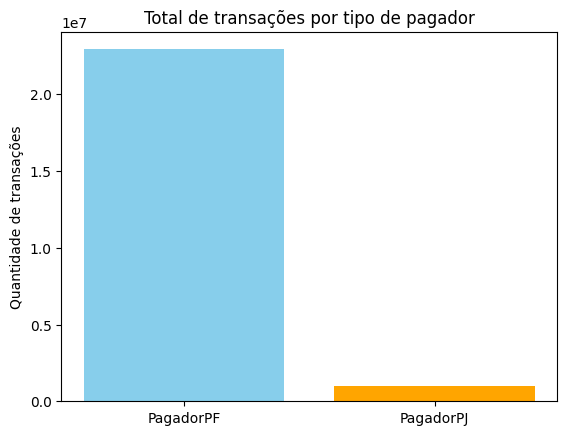

In [102]:
tipos = ['PagadorPF', 'PagadorPJ']
valores = [total_pagador_pf, total_pagador_pj]

plt.bar(tipos, valores, color=['skyblue', 'orange'])
plt.title('Total de transações por tipo de pagador')
plt.ylabel('Quantidade de transações')
plt.show()


In [103]:
df_estado = df_transacoes.groupby('Estado')[['VL_PagadorPF','VL_PagadorPJ']].sum()
df_estado

,VL_PagadorPF,VL_PagadorPJ
Estado,,
ALAGOAS,3.220986e+07,5.856633e+06
ESPÍRITO SANTO,6.774842e+06,3.226821e+06
MARANHÃO,1.079102e+09,2.088266e+08
MATO GROSSO,3.756837e+07,1.719253e+07
MATO GROSSO DO SUL,1.304554e+09,6.095539e+08
MINAS GERAIS,2.471843e+08,9.667451e+07
PARAÍBA,1.717369e+07,3.626848e+06
PERNAMBUCO,1.092116e+09,1.095821e+08
RIO GRANDE DO SUL,2.558669e+08,2.771589e+08


In [104]:
df_transacoes.columns = df_transacoes.columns.str.strip().str.lower()

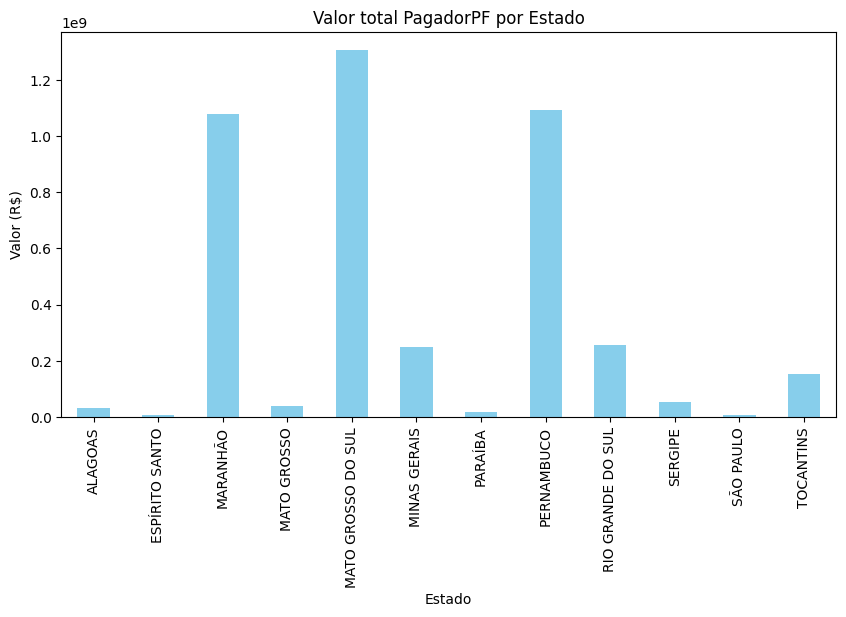

In [105]:
df_estado['VL_PagadorPF'].plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Valor total PagadorPF por Estado')
plt.ylabel('Valor (R$)')
plt.xlabel('Estado')
plt.show()


In [106]:
print(df_chaves.shape)
print(df_chaves.columns)

df_chaves.head(5)

df_chaves['qtdChaves'].describe()


(200, 6)
Index(['Data', 'ISPB', 'Nome', 'NaturezaUsuario', 'TipoChave', 'qtdChaves'], dtype='object')


count       200.000000
mean       8821.395000
std       56595.524342
min           1.000000
25%          26.250000
50%         643.500000
75%        2303.500000
max      751819.000000
Name: qtdChaves, dtype: float64

In [107]:
chaves_tipo = df_chaves.groupby('TipoChave')['qtdChaves'].sum()
chaves_tipo


TipoChave
Aleatória     154733
CNPJ           48284
CPF           208376
Celular       313827
e-mail       1039059
Name: qtdChaves, dtype: int64

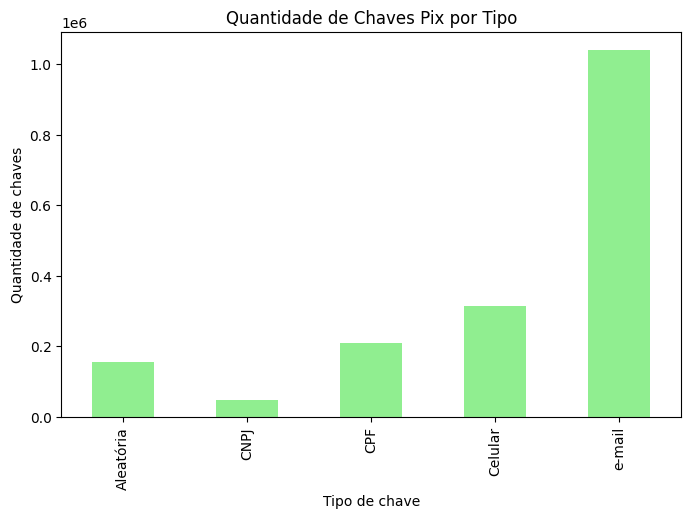

In [108]:
chaves_tipo.plot(kind='bar', color='lightgreen', figsize=(8,5))
plt.title('Quantidade de Chaves Pix por Tipo')
plt.ylabel('Quantidade de chaves')
plt.xlabel('Tipo de chave')
plt.show()


In [109]:
chaves_natureza = df_chaves.groupby('NaturezaUsuario')['qtdChaves'].sum()
chaves_natureza


NaturezaUsuario
PF     622752
PJ    1141527
Name: qtdChaves, dtype: int64

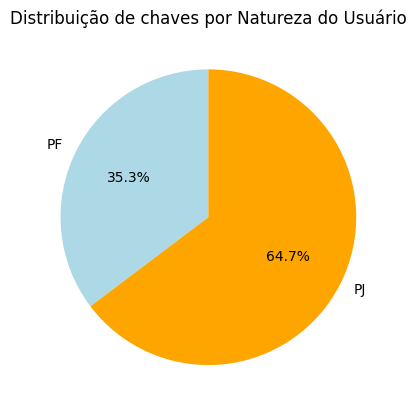

In [110]:
chaves_natureza.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue','orange'])
plt.title('Distribuição de chaves por Natureza do Usuário')
plt.ylabel('')
plt.show()


In [111]:
print(df_transacoes.columns)

Index(['anomes', 'municipio_ibge', 'municipio', 'estado_ibge', 'estado',
       'sigla_regiao', 'regiao', 'vl_pagadorpf', 'qt_pagadorpf',
       'vl_pagadorpj', 'qt_pagadorpj', 'vl_recebedorpf', 'qt_recebedorpf',
       'vl_recebedorpj', 'qt_recebedorpj', 'qt_pes_pagadorpf',
       'qt_pes_pagadorpj', 'qt_pes_recebedorpf', 'qt_pes_recebedorpj'],
      dtype='object')


In [112]:
df_transacoes.columns = df_transacoes.columns.str.strip().str.lower()
print(df_transacoes.columns)

Index(['anomes', 'municipio_ibge', 'municipio', 'estado_ibge', 'estado',
       'sigla_regiao', 'regiao', 'vl_pagadorpf', 'qt_pagadorpf',
       'vl_pagadorpj', 'qt_pagadorpj', 'vl_recebedorpf', 'qt_recebedorpf',
       'vl_recebedorpj', 'qt_recebedorpj', 'qt_pes_pagadorpf',
       'qt_pes_pagadorpj', 'qt_pes_recebedorpf', 'qt_pes_recebedorpj'],
      dtype='object')


In [113]:
df_filtrado.duplicated

<bound method DataFrame.duplicated of      AnoMes  Municipio_Ibge            Municipio  Estado_Ibge  \
0    202308         1508050              TRAIRÃO           15   
1    202109         1508050              TRAIRÃO           15   
2    202405         4315701            RIO PARDO           43   
3    202110         4315701            RIO PARDO           43   
4    202207         3155009             RIO DOCE           31   
..      ...             ...                  ...          ...   
193  202102         4315701            RIO PARDO           43   
196  202503         3304110           PORTO REAL           33   
197  202506         4318507    SÃO JOSÉ DO NORTE           43   
198  202110         3151206             PIRAPORA           31   
199  202501         2101970  BOA VISTA DO GURUPI           21   

                Estado Sigla_Regiao    Regiao  VL_PagadorPF  QT_PagadorPF  \
0                 PARÁ           NO     NORTE   39954676.03        228290   
1                 PARÁ     

In [114]:
df_transacoes = pd.read_json("transacoes_pix.json")

In [115]:
df = pd.read_csv("transacoes_pix_estruturadas.csv")

duplicadas_completas = df[df.duplicated(keep=False)]

print(duplicadas_completas)
duplicadas_completas.to_csv("linhas_duplicadas_completas.csv", index=False)


Empty DataFrame
Columns: [anomes, municipio_ibge, municipio, estado_ibge, estado, sigla_regiao, regiao, vl_pagadorpf, qt_pagadorpf, vl_pagadorpj, qt_pagadorpj, vl_recebedorpf, qt_recebedorpf, vl_recebedorpj, qt_recebedorpj, qt_pes_pagadorpf, qt_pes_pagadorpj, qt_pes_recebedorpf, qt_pes_recebedorpj]
Index: []


In [116]:
print("Transações Pix - Valores nulos:")
print(df_transacoes.isnull().sum())

print("\nChaves Pix - Valores nulos:")
print(df_chaves.isnull().sum())


Transações Pix - Valores nulos:
AnoMes                0
Municipio_Ibge        0
Municipio             0
Estado_Ibge           0
Estado                0
Sigla_Regiao          0
Regiao                0
VL_PagadorPF          0
QT_PagadorPF          0
VL_PagadorPJ          0
QT_PagadorPJ          0
VL_RecebedorPF        0
QT_RecebedorPF        0
VL_RecebedorPJ        0
QT_RecebedorPJ        0
QT_PES_PagadorPF      0
QT_PES_PagadorPJ      0
QT_PES_RecebedorPF    0
QT_PES_RecebedorPJ    0
dtype: int64

Chaves Pix - Valores nulos:
Data               0
ISPB               0
Nome               0
NaturezaUsuario    0
TipoChave          0
qtdChaves          0
dtype: int64


In [117]:
print(df_transacoes.dtypes)
print(df_chaves.dtypes)


AnoMes                  int64
Municipio_Ibge          int64
Municipio              object
Estado_Ibge             int64
Estado                 object
Sigla_Regiao           object
Regiao                 object
VL_PagadorPF          float64
QT_PagadorPF            int64
VL_PagadorPJ          float64
QT_PagadorPJ            int64
VL_RecebedorPF        float64
QT_RecebedorPF          int64
VL_RecebedorPJ        float64
QT_RecebedorPJ          int64
QT_PES_PagadorPF        int64
QT_PES_PagadorPJ        int64
QT_PES_RecebedorPF      int64
QT_PES_RecebedorPJ      int64
dtype: object
Data               object
ISPB               object
Nome               object
NaturezaUsuario    object
TipoChave          object
qtdChaves           int64
dtype: object


In [118]:
df_transacoes = df_transacoes.rename(columns={
    "AnoMes": "ano_mes",
    "Municipio_Ibge": "municipio_ibge",
    "Municipio": "municipio",
    "Estado": "estado",
    "VL_PagadorPF": "valor_pagador_pf",
    "QT_PagadorPF": "qtd_pagador_pf",
    "VL_PagadorPJ": "valor_pagador_pj",
    "QT_PagadorPJ": "qtd_pagador_pj"
})

df_chaves = df_chaves.rename(columns={
    "Data": "data",
    "Nome": "instituicao",
    "NaturezaUsuario": "natureza_usuario",
    "TipoChave": "tipo_chave",
    "qtdChaves": "qtd_chaves"
})


In [119]:
df_transacoes.columns = [col.lower() for col in df_transacoes.columns]
df_chaves.columns = [col.lower() for col in df_chaves.columns]


In [120]:
print("Total de Transações PF:", df_transacoes['qtd_pagador_pf'].sum())
print("Total de Transações PJ:", df_transacoes['qtd_pagador_pj'].sum())
print("Total de Chaves Pix:", df_chaves['qtd_chaves'].sum())


Total de Transações PF: 22933453
Total de Transações PJ: 1026970
Total de Chaves Pix: 1764279


In [121]:
df_estado = df_transacoes.groupby("estado")[["valor_pagador_pf", "valor_pagador_pj"]].sum()
df_estado.head()

,valor_pagador_pf,valor_pagador_pj
estado,,
ALAGOAS,3.220986e+07,5.856633e+06
ESPÍRITO SANTO,6.774842e+06,3.226821e+06
MARANHÃO,1.079102e+09,2.088266e+08
MATO GROSSO,3.756837e+07,1.719253e+07
MATO GROSSO DO SUL,1.304554e+09,6.095539e+08


In [122]:
df_transacoes.columns = [c.lower() for c in df_transacoes.columns]

df_transacoes['municipio'] = df_transacoes['municipio'].str.title()
df_transacoes['estado'] = df_transacoes['estado'].str.upper()


In [123]:
df_transacoes.info()
df_transacoes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano_mes             200 non-null    int64  
 1   municipio_ibge      200 non-null    int64  
 2   municipio           200 non-null    object 
 3   estado_ibge         200 non-null    int64  
 4   estado              200 non-null    object 
 5   sigla_regiao        200 non-null    object 
 6   regiao              200 non-null    object 
 7   valor_pagador_pf    200 non-null    float64
 8   qtd_pagador_pf      200 non-null    int64  
 9   valor_pagador_pj    200 non-null    float64
 10  qtd_pagador_pj      200 non-null    int64  
 11  vl_recebedorpf      200 non-null    float64
 12  qt_recebedorpf      200 non-null    int64  
 13  vl_recebedorpj      200 non-null    float64
 14  qt_recebedorpj      200 non-null    int64  
 15  qt_pes_pagadorpf    200 non-null    int64  
 16  qt_pes_p

,ano_mes,municipio_ibge,municipio,estado_ibge,estado,sigla_regiao,regiao,valor_pagador_pf,qtd_pagador_pf,valor_pagador_pj,qtd_pagador_pj,vl_recebedorpf,qt_recebedorpf,vl_recebedorpj,qt_recebedorpj,qt_pes_pagadorpf,qt_pes_pagadorpj,qt_pes_recebedorpf,qt_pes_recebedorpj
0,202202,2604304,Cedro,26,PERNAMBUCO,NE,NORDESTE,8671955.89,41908,1037543.56,796,8400211.51,35966,1114567.27,2260,3339,68,3351,72
1,202309,2604304,Cedro,26,PERNAMBUCO,NE,NORDESTE,21712918.56,143723,3360010.27,2183,20799003.54,104352,4303659.61,7945,5631,106,5487,115
2,202509,2604304,Cedro,26,PERNAMBUCO,NE,NORDESTE,4524066.98,27084,398174.97,933,4254170.88,17912,725528.66,3400,5028,103,3998,121
3,202208,5002902,Cassilândia,50,MATO GROSSO DO SUL,CO,CENTRO-OESTE,47907459.40,124901,24035863.87,11845,41591859.67,102074,23533438.19,28051,9240,658,9187,671
4,202106,2102077,Bom Lugar,21,MARANHÃO,NE,NORDESTE,2765226.89,8430,626668.16,184,3196409.32,8861,63044.90,226,1215,30,1201,22


In [124]:
df_transacoes.to_csv("transacoes_pix.csv", index=False, encoding="utf-8")
df_chaves.to_csv("chaves_pix.csv", index=False, encoding="utf-8")
